# Group 38 Final Project - Haiwei Hu, Nicholas Thompson

In [8]:
import pandas as pd
import geopandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#read our csv's into several dataframes
incident = pd.read_csv("incident.csv")
neighborhoods = pd.read_csv("neighborhoods.csv")
infrastructure1 = pd.read_csv("crosswalk.csv")
infrastructure2 = pd.read_csv("walkability.csv")
green_space = pd.read_csv("park.csv")

In [9]:
incident_dict_neighborhood = dict()

for index, row in incident.iterrows():
        itemName = row['INCIDENTNEIGHBORHOOD']
        if itemName in incident_dict_neighborhood:
            incident_dict_neighborhood[itemName] = incident_dict_neighborhood[itemName] + 1
        else:
            incident_dict_neighborhood[itemName] = 1
            
print(incident_dict_neighborhood)

{'North Shore': 3235, 'Upper Lawrenceville': 1467, 'Northview Heights': 2365, 'Golden Triangle/Civic Arena': 4278, 'South Side Flats': 16889, 'Elliott': 2291, 'Homewood North': 5840, 'South Side Slopes': 3778, 'Carrick': 10457, 'South Oakland': 2121, nan: 5950, 'Bloomfield': 7854, 'Beechview': 4975, 'Bluff': 4078, 'Strip District': 2956, 'Mount Washington': 6701, 'East Carnegie': 380, 'Crafton Heights': 2464, 'Marshall-Shadeland': 4915, 'East Liberty': 7250, 'East Allegheny': 5297, 'Friendship': 1495, 'Arlington': 1882, 'Central Northside': 786, 'Spring Hill-City View': 2172, 'Brighton Heights': 5531, 'Westwood': 1480, 'East Hills': 4513, 'Brookline': 6712, 'South Shore': 1095, 'Lower Lawrenceville': 2265, 'Bedford Dwellings': 2298, 'Troy Hill-Herrs Island': 252, 'Central Oakland': 4688, 'Garfield': 3102, 'West End': 1100, 'West Oakland': 1729, 'Central Lawrenceville': 3948, 'Lincoln-Lemington-Belmar': 5987, 'Sheraden': 5307, 'Beltzhoover': 1817, 'Outside City': 1944, 'Squirrel Hill So

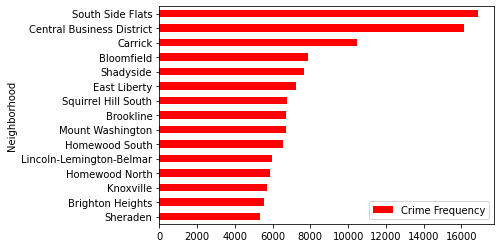

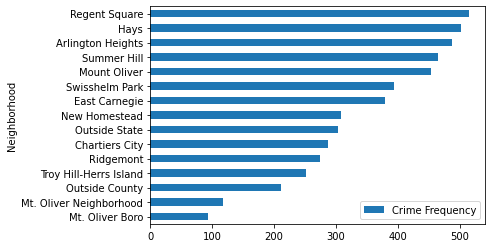

In [7]:
#now that we have a dictionary with neighborhood names and the average severity of their crimes
#we should make it into a dataframe

#make the dict into a series, then into a datafram
neighborhood_crime_frequency = pd.Series(incident_dict_neighborhood).to_frame()

#to name the columns we need to reset the index
neighborhood_crime_frequency = neighborhood_crime_frequency.reset_index()

#now name the columns
neighborhood_crime_frequency.columns = ['Neighborhood','Crime Frequency']

#sort the rows by crime average, low to high
neighborhood_crime_frequency = neighborhood_crime_frequency.sort_values('Crime Frequency')

#remove any NaN values
neighborhood_crime_frequency = neighborhood_crime_frequency.dropna()

#reorder the index from 0-97
neighborhood_crime_frequency = neighborhood_crime_frequency.reset_index(drop = True)

#total crime since 2016
neighborhood_crime_frequency.tail(15).plot.barh(x='Neighborhood', color='red')

neighborhood_crime_frequency.head(15).plot.barh(x='Neighborhood')

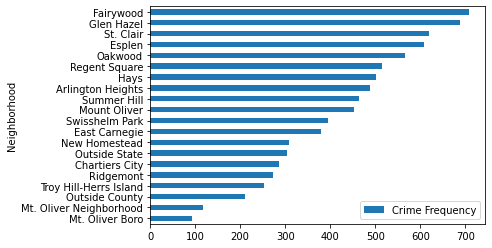

In [8]:
neighborhood_crime_frequency.head(20).plot.barh(x='Neighborhood')

In [10]:
incident_dict_severity = dict()

for index, row in incident.iterrows():
    neighborhood_name = row['INCIDENTNEIGHBORHOOD']
    init_string = row['OFFENSES']
    almost_there = init_string[0:4]
    offense_num = ''.join(c for c in almost_there if c.isdigit())
    if neighborhood_name in incident_dict_severity:
        incident_dict_severity[neighborhood_name] = incident_dict_severity[neighborhood_name] + int(offense_num)
    else:
        incident_dict_severity[neighborhood_name] = int(offense_num)
        
print(incident_dict_severity)

{'North Shore': 15449017, 'Upper Lawrenceville': 7342240, 'Northview Heights': 11178813, 'Golden Triangle/Civic Arena': 19796762, 'South Side Flats': 73529334, 'Elliott': 11706320, 'Homewood North': 26086825, 'South Side Slopes': 17657918, 'Carrick': 49179044, 'South Oakland': 10583481, nan: 25090107, 'Bloomfield': 36226302, 'Beechview': 25477777, 'Bluff': 20188361, 'Strip District': 14057898, 'Mount Washington': 32251707, 'East Carnegie': 2036882, 'Crafton Heights': 12987074, 'Marshall-Shadeland': 23799191, 'East Liberty': 33917048, 'East Allegheny': 24640565, 'Friendship': 6864107, 'Arlington': 8766285, 'Central Northside': 3340143, 'Spring Hill-City View': 10390098, 'Brighton Heights': 26726140, 'Westwood': 7455684, 'East Hills': 20527400, 'Brookline': 34849302, 'South Shore': 5205124, 'Lower Lawrenceville': 10625512, 'Bedford Dwellings': 11227259, 'Troy Hill-Herrs Island': 1219491, 'Central Oakland': 20535234, 'Garfield': 15084268, 'West End': 6668510, 'West Oakland': 8463362, 'Cen

In [11]:
#now lets average out the level of crime based on the number of incidents
for neighborhood, value in incident_dict_severity.items():
    
    incident_dict_severity[neighborhood] = incident_dict_severity[neighborhood]/incident_dict_neighborhood[neighborhood]
    
print(incident_dict_severity)

{'North Shore': 4775.58485316847, 'Upper Lawrenceville': 5004.935241990457, 'Northview Heights': 4726.770824524313, 'Golden Triangle/Civic Arena': 4627.574100046751, 'South Side Flats': 4353.681923145243, 'Elliott': 5109.698821475338, 'Homewood North': 4466.922089041096, 'South Side Slopes': 4673.8798305982, 'Carrick': 4702.97829205317, 'South Oakland': 4989.854314002829, nan: 4216.824705882353, 'Bloomfield': 4612.465240641711, 'Beechview': 5121.16120603015, 'Bluff': 4950.554438450221, 'Strip District': 4755.71650879567, 'Mount Washington': 4812.969258319654, 'East Carnegie': 5360.215789473684, 'Crafton Heights': 5270.728084415585, 'Marshall-Shadeland': 4842.154832146491, 'East Liberty': 4678.213517241379, 'East Allegheny': 4651.796299792335, 'Friendship': 4591.375919732442, 'Arlington': 4657.962274176408, 'Central Northside': 4249.545801526718, 'Spring Hill-City View': 4783.654696132597, 'Brighton Heights': 4832.062918097993, 'Westwood': 5037.624324324324, 'East Hills': 4548.504320850

In [12]:
#now that we have a dictionary with neighborhood names and the average severity of their crimes
#we should make it into a dataframe

#make the dict into a series, then into a datafram
neighborhood_crime_average_severity = pd.Series(incident_dict_severity).to_frame()

#to name the columns we need to reset the index
neighborhood_crime_average_severity = neighborhood_crime_average_severity.reset_index()

#now name the columns
neighborhood_crime_average_severity.columns = ['Neighborhoods','Crime Average']

#sort the rows by crime average, low to high
neighborhood_crime_average_severity = neighborhood_crime_average_severity.sort_values('Crime Average')

#remove any NaN values
neighborhood_crime_average_severity = neighborhood_crime_average_severity.dropna()

#reorder the index from 0-97
neighborhood_crime_average_severity = neighborhood_crime_average_severity.reset_index(drop = True)


print(neighborhood_crime_average_severity)


              Neighborhoods  Crime Average
0   Mt. Oliver Neighborhood    4028.752137
1                  Fineview    4227.833645
2         Central Northside    4249.545802
3                 St. Clair    4292.888710
4            Homewood South    4330.019761
..                      ...            ...
93                  Chateau    6320.259659
94     California-Kirkbride    6548.705120
95             Outside City    6619.939300
96           Outside County    7030.616114
97            Outside State    7066.382838

[98 rows x 2 columns]


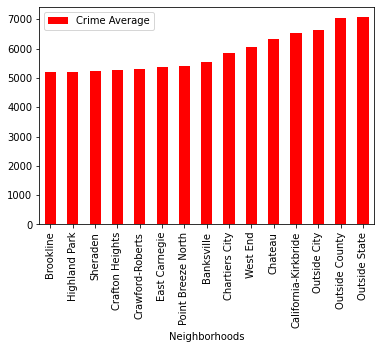

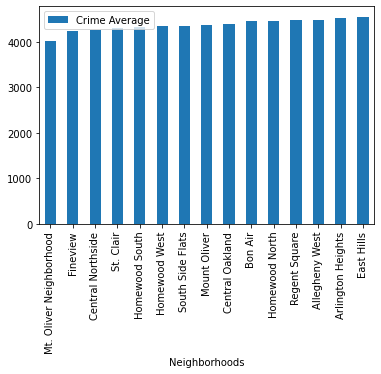

In [13]:
#create two bar graphs, one for best neighborhoods
neighborhood_crime_average_severity.tail(15).plot.bar(x='Neighborhoods', color='red')

#one for worst neighborhoods
neighborhood_crime_average_severity.head(15).plot.bar(x='Neighborhoods')


In [14]:
#lets create a dictionary storing the number of crosswalks each neighborhood has
crosswalk_frequency = dict()

for index, row in infrastructure1.iterrows():
        itemName = row['neighborhood']
        if itemName in crosswalk_frequency:
            crosswalk_frequency[itemName] = crosswalk_frequency[itemName] + 1
        else:
            crosswalk_frequency[itemName] = 1
            
print(crosswalk_frequency)

{'Central Business District': 402, 'Strip District': 114, 'Morningside': 33, 'Squirrel Hill North': 112, 'Squirrel Hill South': 239, 'Shadyside': 190, 'Polish Hill': 29, 'North Oakland': 125, 'West Oakland': 41, 'Central Oakland': 113, 'East Liberty': 146, 'Bloomfield': 192, 'South Oakland': 66, 'Stanton Heights': 22, 'Terrace Village': 67, 'Highland Park': 64, 'Bluff': 82, 'Lincoln-Lemington-Belmar': 29, 'Lincoln Place': 15, 'Lower Lawrenceville': 40, 'Crawford-Roberts': 63, 'Middle Hill': 59, 'Bedford Dwellings': 8, 'Upper Hill': 21, 'Point Breeze': 91, 'Larimer': 58, 'Point Breeze North': 53, 'Homewood West': 20, 'Homewood North': 40, 'Homewood South': 81, 'East Hills': 21, nan: 14, 'Friendship': 37, 'Regent Square': 15, 'South Side Flats': 262, 'South Shore': 15, 'Swisshelm Park': 7, 'Greenfield': 68, 'Hazelwood': 68, 'Glen Hazel': 7, 'Elliott': 25, 'Hays': 7, 'Esplen': 15, 'New Homestead': 1, 'Central Lawrenceville': 81, 'West End': 24, 'Troy Hill': 40, 'East Allegheny': 60, 'Spri

In [15]:
#make the dict into a series, then into a dataframe
neighborhood_crosswalk_frequency = pd.Series(crosswalk_frequency).to_frame()

#to name the columns we need to reset the index
neighborhood_crosswalk_frequency = neighborhood_crosswalk_frequency.reset_index()

#now name the columns
neighborhood_crosswalk_frequency.columns = ['Neighborhood','Crosswalks']

#sort the rows by crime average, low to high
neighborhood_crosswalk_frequency = neighborhood_crosswalk_frequency.sort_values('Crosswalks')

#remove any NaN values
neighborhood_crosswalk_frequency = neighborhood_crosswalk_frequency.dropna()

#reorder the index from 0-97
neighborhood_crosswalk_frequency = neighborhood_crosswalk_frequency.reset_index(drop = True)


print(neighborhood_crosswalk_frequency)

                 Neighborhood  Crosswalks
0               New Homestead           1
1              Chartiers City           1
2                   St. Clair           1
3                 Summer Hill           3
4                    Fineview           3
..                        ...         ...
83                  Shadyside         190
84                 Bloomfield         192
85        Squirrel Hill South         239
86           South Side Flats         262
87  Central Business District         402

[88 rows x 2 columns]


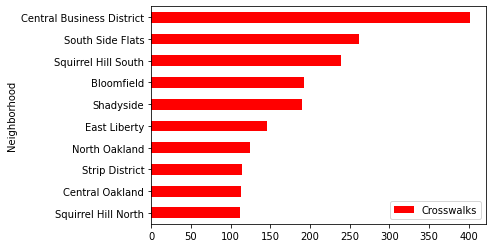

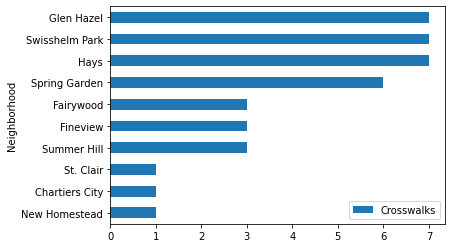

In [16]:
#create two bar graphs, one for best neighborhoods
neighborhood_crosswalk_frequency.tail(10).plot.barh(x='Neighborhood', color='red')

#one for worst neighborhoods
neighborhood_crosswalk_frequency.head(10).plot.barh(x='Neighborhood')


# Sub-metric 2: Infrastructure Part 2 - Haiwei

As described previously, the second sub-metric we chose to analyse is infrastructure, as it is an important consideration for those who regularly walk dogs. I looked at the sidewalk to street "walkability" ratio.

Let's import the neighborhood data and inspect it.

In [17]:
pgh = geopandas.read_file("Neighborhoods_.shp")
pgh.head()

,geometry
0,"POLYGON ((-79.90560 40.45522, -79.90553 40.455..."
1,"POLYGON ((-79.91309 40.43804, -79.91321 40.438..."
2,"POLYGON ((-79.93457 40.47217, -79.93455 40.472..."
3,"POLYGON ((-79.96601 40.45520, -79.96596 40.454..."
4,"POLYGON ((-79.98845 40.41851, -79.98821 40.418..."


Plotting the neighborhoods:

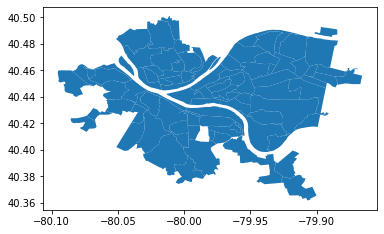

In [18]:
pgh.plot()

Now we read in the csv file containing walkability ratios:

In [19]:
walkability = geopandas.read_file('sidewalkstreetratioupload.csv') # read in the csv file
walkability = walkability.rename(index=str, columns={"SidewalkStepLFt":"Sidewalk Length",
                                                     "StreetLFt":"Street Length",}) # renaming column titles for readability
walkability = walkability.drop('geometry', axis=1) # remove unnecessary column
walkability.head()

,GEOID,NAMELSAD,Sidewalk Length,Street Length,Ratio
0,420030103001,Block Group 1,13392.8331,30315.8639,0.441776396
1,420030103002,Block Group 2,31944.47597,20586.79493,1.551697391
2,420030103003,Block Group 3,18655.20798,12122.70024,1.538865732
3,420030103004,Block Group 4,14456.19616,11567.62831,1.24971133
4,420030201001,Block Group 1,43952.94811,24426.52459,1.799394258


Let's prepare the data for plotting.

In [30]:
walkabilityMap = pgh.merge(walkability, how='left', left_on='geoid10', right_on='GEOID')
walkabilityMap.head()

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry,GEOID,NAMELSAD,Sidewalk Length,Street Length,Ratio
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.153647e+06,14047.065024,"POLYGON ((-79.90560 40.45522, -79.90553 40.455...",420031405003,Block Group 3,14314.35819,6171.791993,2.319319609
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.407739e+07,30347.886823,"POLYGON ((-79.91309 40.43804, -79.91321 40.438...",420031401003,Block Group 3,23168.94754,6408.606643,3.615286259
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275116e+07,14577.441571,"POLYGON ((-79.93457 40.47217, -79.93455 40.472...",420031017002,Block Group 2,18962.43415,8163.046727,2.322960383
3,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,4997335.5,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,4.997845e+06,14216.959213,"POLYGON ((-79.96601 40.45520, -79.96596 40.454...",420030509001,Block Group 1,34060.43485,5125.794855,6.644907924
4,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,S,...,8411048.0,8669d2f0-b886-4519-99d0-bb1015b592b0,8.410563e+06,12003.269761,"POLYGON ((-79.98845 40.41851, -79.98821 40.418...",420033001005,Block Group 5,12063.35028,7293.079868,1.654081745


Text(0.1, 0.08, 'Source: WPRDC, 2021')

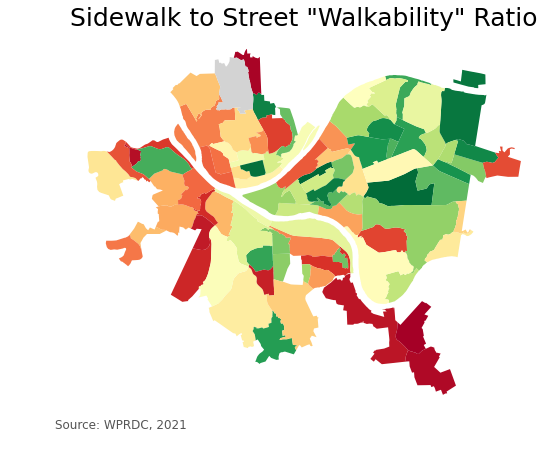

In [18]:
wm = walkabilityMap.plot(column = 'Ratio', 
                         cmap = 'RdYlGn',
                         figsize = (10,7), 
                         missing_kwds = {'color': 'lightgrey'},
                         # legend = True,
                         )
wm.set_axis_off()
wm.set_title('Sidewalk to Street "Walkability" Ratio', 
             fontdict={'fontsize': '25', 'fontweight' : '3'})
wm.annotate('Source: WPRDC, 2021',xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

<ipython-input-19-8588691ce4e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_data['Ratio'] = bar_data['Ratio'].astype(float)


Text(0, 0.5, 'Neighborhood')

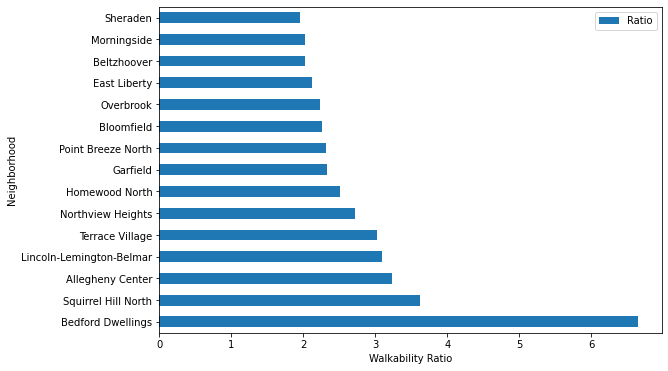

In [19]:
bar_data = walkabilityMap[['Ratio', 'hood']]
bar_data['Ratio'] = bar_data['Ratio'].astype(float)
bar_data_sorted = bar_data.sort_values('Ratio', ascending=False).head(15)
ratio_bar = bar_data_sorted.plot(y='Ratio', x='hood', kind='barh',figsize = (9,6))
plt.xlabel("Walkability Ratio")
plt.ylabel("Neighborhood")

# Sub-metric 3: Infrastructure Part 2 - Haiwei


Though I have never owned a dog, I wouuld imagine that having open green space would be beneficial to dog health. Thus, I chose to analyse the number of parks per neighborhood.

As we have already read in the neighborhood data, let's import the parks data set.

In [20]:
parks = geopandas.read_file('park.csv') # read in the csv file
parks.head()

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude,geometry
0,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.4081182,-80.02819656,None
1,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.44050716,-79.98401757,None
2,1544096765,Alcoa Park,Park,Parks - Northern,,North Shore,1,22,42003563200,6,22,1,1-20,40.44748073,-80.00101726,None
3,1212681573,Allegheny Commons,Park,Parks - Northern,,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.4531264,-80.00915763,None
4,954863286,Allegheny Landing Park,Park,Parks - Northern,,North Shore,1,22,42003563200,6,22,1,1-20,40.44718412,-80.0029073,None


The data includes entries for traffic islands and building grounds, which aren't useful for most dog owners. Let's eliminate any entry that is not a park and calculate the number of parks within each tract.

In [21]:
parks = parks.drop(parks[parks['type'] != 'Park'].index) # remove non-park entries
parkSum = pd.DataFrame((parks['neighborhood'].value_counts()[x] for x in parks['neighborhood']),parks['neighborhood'])
parkSum.columns = {'Number of Parks'} # rename column
parkSum = parkSum[~parkSum.index.duplicated(keep='first')] # remove duplicates
parkSum.head()

,Number of Parks
neighborhood,
Beechview,6
Crawford-Roberts,3
North Shore,3
Allegheny Center,2
Central Business District,3


Let's merge the park dataframe with the neighborhood shape data.

In [35]:
parksMap = pgh.merge(parkSum, how='left', left_on='hood', right_on='neighborhood') 
parksMap.head()

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_da,last_edite,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry,Number of Parks
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,2020-08-14,SDE,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.153647e+06,14047.065024,"POLYGON ((-79.90560 40.45522, -79.90553 40.455...",1.0
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,2020-08-14,SDE,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.407739e+07,30347.886823,"POLYGON ((-79.91309 40.43804, -79.91321 40.438...",1.0
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,2020-08-14,SDE,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275116e+07,14577.441571,"POLYGON ((-79.93457 40.47217, -79.93455 40.472...",3.0
3,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,2020-08-14,SDE,2020-08-14,None,4997335.5,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,4.997845e+06,14216.959213,"POLYGON ((-79.96601 40.45520, -79.96596 40.454...",1.0
4,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,S,...,2020-08-14,SDE,2020-08-14,None,8411048.0,8669d2f0-b886-4519-99d0-bb1015b592b0,8.410563e+06,12003.269761,"POLYGON ((-79.98845 40.41851, -79.98821 40.418...",NaN


Text(0.1, 0.08, 'Source: WPRDC, 2021')

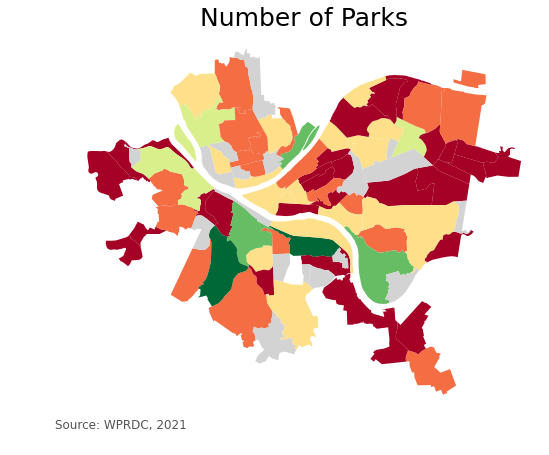

In [36]:
pm = parksMap.plot(column = 'Number of Parks', 
                         cmap = 'RdYlGn',
                         figsize = (10,7), 
                         missing_kwds = {'color': 'lightgrey'},
                         # legend = True,
                         )
pm.set_axis_off()
pm.set_title('Number of Parks', 
             fontdict={'fontsize': '25', 'fontweight' : '3'})
pm.annotate('Source: WPRDC, 2021',xy=(0.1, .08),  
            xycoords='figure fraction', 
            horizontalalignment='left', 
            verticalalignment='top', 
            fontsize=12, 
            color='#555555')

In [1]:
bar_data = parksMap[['Number of Parks', 'hood']]
bar_data['Number of Parks'] = bar_data['Number of Parks'].astype(float)
bar_data_sorted = bar_data.sort_values('Number of Parks', ascending=False).head(15)
ratio_bar = bar_data_sorted.plot(y='Number of Parks', x='hood', kind='barh',figsize = (9,6))
plt.xlabel("Number of Parks")
plt.ylabel("Neighborhood")

NameError: name 'parksMap' is not defined

Nicholas: Based on my datasets, the best neighborhood to have a dog in is a three way tie between Central Business District based on Crosswalks, Troy hill based on number of crimes committed since 2016, and Point Breeze north based on the average severity of crimes committed in neighborhoods. From a subjective view, I considered squirrel hill to be the best but after seeing the frequency of crimes since 2016 I was surprised.

Haiwei: There was not a clear cut winner across both of my data sets due to the nature of data collection as described above. My favorite neighborhood is Squirrel Hill due to the restaurants and shops found there; naturally, our determination was different as it aimed to find the best neighborhood for a specific subset of the population (dog owners), to which I do not belong.

Combined: Based on the number of Parks and Crime rate, several neighborhoods were close contenders. Ultimately we chose Beechview. A close second would have been Squirrel Hill South due to the size of Frick park and the crime severity average. 

Walkability seemed like a good metric at first but really all it told us was which neighborhoods had more streets and car traffic. This ended up being an antagonistic data set towards our best neighborhood metric.

It seems that really whichever neighborhoods have the most park acreage and the lowest crime severity averages would make the best neighborhoods to own a dog in. 